<img src='pics/otus.png'>

In [1]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

## 0. Выберите любой датасет, связанный с медицинской тематикой.

Выбран датасет https://www.kaggle.com/ruslankl/mice-protein-expression

# 1. Провести EDA
Просмотреть структуру данных, значения каждого признака, поискать особенности в признаках и в данных вцелом

In [2]:
df =pd.read_csv('Data_Cortex_Nuclear.csv')

In [3]:
df.head(3)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.50,0.75,0.43,2.82,5.99,0.22,0.18,2.37,0.23,...,0.11,0.43,0.11,0.13,0.13,1.68,Control,Memantine,C/S,c-CS-m
1,309_2,0.51,0.69,0.41,2.79,5.69,0.21,0.17,2.29,0.23,...,0.10,0.44,0.11,0.14,0.13,1.74,Control,Memantine,C/S,c-CS-m
2,309_3,0.51,0.73,0.42,2.69,5.62,0.21,0.18,2.28,0.23,...,0.11,0.44,0.11,0.13,0.13,1.93,Control,Memantine,C/S,c-CS-m


Краткое описание признаков:
[1] Mouse ID

[2:78] Values of expression levels of 77 proteins; the names of proteins are followed by N indicating that they were measured in the nuclear fraction. *For example: DYRK1A_n*

[79] Genotype: control (c) or trisomy (t)

[80] Treatment type: memantine (m) or saline (s)

[81] Behavior: context-shock (CS) or shock-context (SC)

[82] Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m

В качетве целевой переменной будем использовать классы, признаки - сила экспресси в генах.

Уберем лишнее и проанализируем, какие значения у нас есть

In [4]:
df = df.drop(labels = ['MouseID', 'Genotype', 'Treatment', 'Behavior'], axis=1) 

In [5]:
df.head(3)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.50,0.75,0.43,2.82,5.99,0.22,0.18,2.37,0.23,1.75,...,0.12,nan,0.11,0.11,0.43,0.11,0.13,0.13,1.68,c-CS-m
1,0.51,0.69,0.41,2.79,5.69,0.21,0.17,2.29,0.23,1.60,...,0.12,nan,0.11,0.10,0.44,0.11,0.14,0.13,1.74,c-CS-m
2,0.51,0.73,0.42,2.69,5.62,0.21,0.18,2.28,0.23,1.56,...,0.12,nan,0.11,0.11,0.44,0.11,0.13,0.13,1.93,c-CS-m


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 78 columns):
DYRK1A_N           1077 non-null float64
ITSN1_N            1077 non-null float64
BDNF_N             1077 non-null float64
NR1_N              1077 non-null float64
NR2A_N             1077 non-null float64
pAKT_N             1077 non-null float64
pBRAF_N            1077 non-null float64
pCAMKII_N          1077 non-null float64
pCREB_N            1077 non-null float64
pELK_N             1077 non-null float64
pERK_N             1077 non-null float64
pJNK_N             1077 non-null float64
PKCA_N             1077 non-null float64
pMEK_N             1077 non-null float64
pNR1_N             1077 non-null float64
pNR2A_N            1077 non-null float64
pNR2B_N            1077 non-null float64
pPKCAB_N           1077 non-null float64
pRSK_N             1077 non-null float64
AKT_N              1077 non-null float64
BRAF_N             1077 non-null float64
CAMKII_N           1077 non-null

Есть значения, где есть нулевые значения, заполним их средним значениями из групп

In [7]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.00,1077.00,1077.00,1077.00,1077.00,1077.00,1077.00,1077.00,1077.00,1077.00,...,1080.00,867.00,795.00,1080.00,1005.00,1080.00,900.00,870.00,810.00,1080.00
mean,0.43,0.62,0.32,2.30,3.84,0.23,0.18,3.54,0.21,1.43,...,0.23,0.16,0.13,0.12,0.13,0.45,0.17,0.18,0.21,1.34
std,0.25,0.25,0.05,0.35,0.93,0.04,0.03,1.30,0.03,0.47,...,0.03,0.03,0.03,0.01,0.02,0.07,0.06,0.04,0.06,0.32
min,0.15,0.25,0.12,1.33,1.74,0.06,0.06,1.34,0.11,0.43,...,0.16,0.09,0.08,0.07,0.09,0.26,0.08,0.11,0.10,0.59
25%,0.29,0.47,0.29,2.06,3.16,0.21,0.16,2.48,0.19,1.20,...,0.21,0.14,0.12,0.11,0.11,0.40,0.13,0.16,0.17,1.08
50%,0.37,0.57,0.32,2.30,3.76,0.23,0.18,3.33,0.21,1.36,...,0.22,0.15,0.13,0.12,0.13,0.45,0.16,0.17,0.19,1.32
75%,0.49,0.70,0.35,2.53,4.44,0.26,0.20,4.48,0.23,1.56,...,0.24,0.17,0.15,0.13,0.14,0.49,0.20,0.20,0.24,1.59
max,2.52,2.60,0.50,3.76,8.48,0.54,0.32,7.46,0.31,6.11,...,0.36,0.28,0.26,0.16,0.26,0.76,0.48,0.36,0.41,2.13


Показатели имеют различный разброс - нужно его выровнить

In [8]:
import seaborn

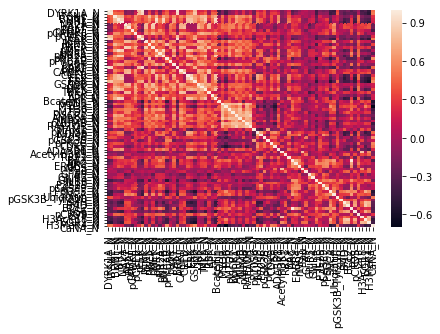

In [9]:
corr = df.corr()
seaborn.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# 2. Спланировать эксперимент 


Эксперимент - составить план, по которому будет проделана исследовательская работа. Примерные пункты плана:
* Составить первичный список признаков, необходимых для решения задачи
* Сгенерировать список новых признаков, которые можно получить из данных
* Применить понижение размерности для визуализации данных
* Применить кластеризацию, визуализировать
* Описание кластера
* Любые другие пункты

- 1 - заполнить нулевые значения средними по выборке
- 2 - генерировать не будем, их и так много, да и сложно комбинировать экспрессию в генах
- 3 - отмасштабировать призники
- 4 - перевести целевую переменную в категориальную
- 5 - Применить logistic regression с cv на 5 фолдов
- 6 - точность проверям auc-score
- 7 - понижаем размерность  по PCA (до 2 и до оптимального параметра)
- 8 - визуализируем 
- 9 - снова применяем log regression
- 10 - точность проверям auc-score
- 11 - понижаем размерность  по tsne (до 2 и до оптимального параметра)
- 12 - визуализируем 
- 13 - снова применяем log regression
- 14 - точность проверям auc-score
- 15 - ради интереса класстиризуем и визуализируем

# 3. Выполнить подготовку данных для построения модели

Выполнить необходимые преобразования данных

In [11]:
y = df['class']

In [12]:
X = df.drop('class', axis=1)

In [14]:
X.fillna(X.mean(), inplace=True)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 77 columns):
DYRK1A_N           1080 non-null float64
ITSN1_N            1080 non-null float64
BDNF_N             1080 non-null float64
NR1_N              1080 non-null float64
NR2A_N             1080 non-null float64
pAKT_N             1080 non-null float64
pBRAF_N            1080 non-null float64
pCAMKII_N          1080 non-null float64
pCREB_N            1080 non-null float64
pELK_N             1080 non-null float64
pERK_N             1080 non-null float64
pJNK_N             1080 non-null float64
PKCA_N             1080 non-null float64
pMEK_N             1080 non-null float64
pNR1_N             1080 non-null float64
pNR2A_N            1080 non-null float64
pNR2B_N            1080 non-null float64
pPKCAB_N           1080 non-null float64
pRSK_N             1080 non-null float64
AKT_N              1080 non-null float64
BRAF_N             1080 non-null float64
CAMKII_N           1080 non-null

In [18]:
from sklearn import preprocessing

In [20]:
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
X_scaled[0:1]

array([[0.1511224 , 0.21288505, 0.82463786, 0.61211939, 0.63048232,
        0.32700587, 0.44866634, 0.16825719, 0.61732205, 0.23255279,
        0.15764338, 0.57616682, 0.74768812, 0.59850371, 0.57477459,
        0.28669707, 0.65063705, 0.69816413, 0.62278415, 0.71119844,
        0.13691507, 0.41964854, 0.31714888, 0.59371483, 0.6279069 ,
        0.59626875, 0.64016736, 0.64307006, 0.76614614, 0.29559592,
        0.54981707, 0.74744085, 0.09203489, 0.54119566, 0.15233784,
        0.68726926, 0.55392167, 0.46727792, 0.5099961 , 0.46946126,
        0.4361703 , 0.50601753, 0.16336829, 0.32305865, 0.37325416,
        0.60451592, 0.30336345, 0.17845796, 0.32408545, 0.40280956,
        0.08358366, 0.32786962, 0.69025721, 0.42681623, 0.4127206 ,
        0.47783402, 0.05716795, 0.22882536, 0.53116295, 0.15110301,
        0.24260849, 0.16970155, 0.43284301, 0.48378312, 0.04476956,
        0.25669889, 0.40522832, 0.16294068, 0.17731204, 0.29917191,
        0.42681623, 0.13392994, 0.33629928, 0.08

Теперь y

In [24]:
y = y.astype('category')

In [66]:
y.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [29]:
le = preprocessing.LabelEncoder()

In [30]:
y = le.fit_transform(y)

In [67]:
le.classes_

array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
       't-SC-m', 't-SC-s'], dtype=object)

In [71]:
unique, counts = np.unique(y, return_counts=True)

In [73]:
unique, counts


(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([150, 135, 150, 135, 135, 105, 135, 135], dtype=int64))

Классы уравновешены относительно

# 4. Провести построение модели 

Сначала обучим LogRegression c 5 CV. И проверим качество на AUC_SCORE

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [35]:
from sklearn.linear_model import LogisticRegressionCV

In [41]:
lr = LogisticRegressionCV(cv=5)

In [42]:
lr.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [45]:
y_predict = lr.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score


In [47]:
accuracy_score(y_test, y_predict)

0.9938271604938271

Неплохая оценка

In [50]:
lr.coef_.shape

(8, 77)

In [55]:
lr.coef_.mean(axis=0)

array([-2.82175333, -1.75905059, -0.03958283, -0.73536754,  0.21061142,
        0.53888501, -0.02442221, -0.76493468, -2.41454759, -0.09301102,
       -2.79583528,  3.6195608 ,  0.80591125,  1.65509293, -1.20733464,
       -3.23046351, -2.92628321, -3.63885925, -0.01662834,  3.03775171,
       -1.877644  ,  0.4635828 ,  0.2817403 , -1.22775974,  1.845311  ,
       -0.86054795,  0.89248633,  0.15722792,  1.91162587, -1.47374233,
        2.3320506 , -1.17253212, -2.52245296,  2.20093333, -2.77472935,
       -1.19965592,  0.98260907, -2.40818995, -1.97616149, -0.69304421,
        0.47537565,  2.2589408 , -5.22924571, -1.33176781, -1.32162979,
        1.70445401, -0.20566462,  0.65962919, -1.14834892, -0.19547831,
        1.60516354, -1.25847608, -2.11762272,  0.12654191,  2.97883881,
        0.75424131, -1.55208726, -0.24207662, -1.79517727, -2.54263069,
       -2.18663562,  3.2101805 ,  1.56024977,  1.33730889, -1.76535473,
        0.06098502,  0.40516199,  1.42830578,  0.21837001, -0.68

In [56]:
lr.coef_.max(axis=0)

array([ 2.47121085, 13.33996691,  8.25789194,  6.53078927, 12.1194609 ,
        8.78169948, 13.72878567, 13.67179088,  6.01942108,  7.8151063 ,
        4.92677661, 25.09261136, 22.51388924, 11.29223043, 13.01084162,
        7.77627403,  8.36896335, 13.00197506,  6.25340795, 16.58641202,
        5.29980234, 16.06792048,  5.00561152,  5.69535047, 31.23264059,
        9.96586073, 19.1502994 ,  5.25068187, 10.35184563,  9.4398839 ,
       33.50894471, 10.56412556, 18.63273663, 19.1504093 ,  4.9505137 ,
       12.29291375, 11.0926457 ,  4.67226422,  3.20533681, 14.6016007 ,
        9.10750763, 22.98454924,  5.01249539, 12.94605202,  7.62220652,
        9.98149408, 15.4960937 ,  5.48386348, 19.77548452,  6.05442231,
       14.23113975,  7.28694198,  5.67464724,  4.61599182, 22.23245062,
       22.36229116,  8.34782443, 11.13139668, 13.7032915 ,  1.77672793,
        9.42009054, 13.04099047, 25.65494639,  8.94410237,  5.41230229,
        8.84455997, 19.51435716, 14.74559985, 10.70870469,  4.64

In [60]:
np.abs(lr.coef_).min(axis=0)

array([1.46711302, 0.05408238, 0.37171116, 0.26539082, 0.21790922,
       0.6077824 , 0.03877721, 0.86999879, 0.79229609, 0.2292878 ,
       0.80202559, 0.11261784, 0.8199275 , 0.42985868, 0.15564998,
       0.89048903, 0.09596541, 1.56937573, 0.5948    , 0.88978948,
       1.21736266, 0.00818476, 0.71303961, 0.01193303, 0.89833205,
       1.36199742, 1.02348706, 0.43841365, 2.18863284, 0.58326292,
       0.92456487, 0.24562122, 1.47479203, 0.6858673 , 0.81606756,
       0.62245707, 0.35730306, 1.47727087, 0.19167886, 1.06030238,
       0.06005943, 0.61034783, 0.69707486, 0.43090329, 3.2634496 ,
       1.26100826, 1.33873219, 0.3312179 , 0.43542463, 0.42612425,
       0.19511441, 0.43832907, 0.46912134, 1.10133909, 0.63461617,
       0.11714533, 1.25487217, 0.01085249, 0.27199824, 0.04160165,
       4.43829041, 3.99593713, 2.8766172 , 0.28876786, 0.5174999 ,
       0.0983677 , 0.37460522, 0.53089986, 0.15746636, 0.06100807,
       1.10133909, 0.30686018, 2.22143928, 1.22482221, 0.74257

Чисто визуально, коэффициенты НЕ занижены.

Немного украдем кода из лекции:

In [64]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

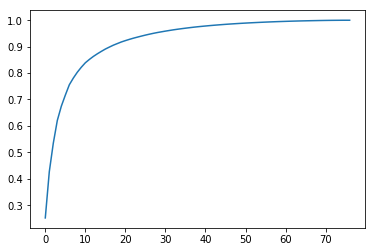

In [75]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

Возьмем первые 20

In [76]:
pca = PCA(n_components=20)
x_train_pca = pca.fit_transform(x_train)

In [87]:
lr = LogisticRegressionCV(cv=5)
lr.fit(x_train_pca, y_train)
y_pred20 = lr.predict(pca.transform(x_test))
accuracy_score(y_test, y_pred)

0.2993827160493827

Упало, но не намного. Повторим для n=2, чтобы визуализировать

In [79]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
lr = LogisticRegressionCV(cv=5)
lr.fit(x_train_pca, y_train)
y_pred = lr.predict(pca.transform(x_test))
accuracy_score(y_test, y_pred)

0.2993827160493827

Как видно, точно очень плохая. Попробуем визуализировать

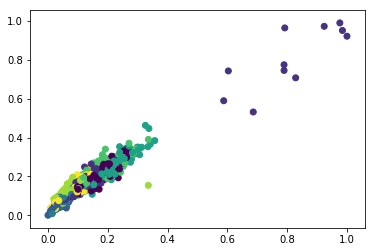

In [83]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

Не очень четко

Теперь повторим в from sklearn.manifold import TSNE

In [84]:
from sklearn.manifold import TSNE

Text(0.5,1,'Попытка разграничение с TSNE. Классы истинные')

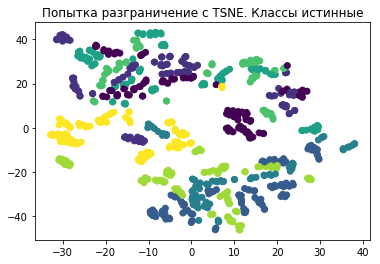

In [88]:
tsne = TSNE(n_components=2)
x_train_tsne = tsne.fit_transform(x_train)
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=y_train)
plt.title('Попытка разграничение с TSNE. Классы истинные, perplexity = 30')

Text(0.5,1,'Попытка разграничение с TSNE. Классы истинные')

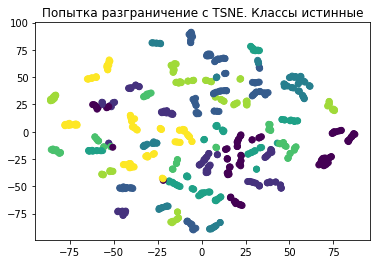

In [90]:
tsne = TSNE(n_components=2, perplexity = 5)
x_train_tsne = tsne.fit_transform(x_train)
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=y_train)
plt.title('Попытка разграничение с TSNE. Классы истинные, perplexity = 5')

Text(0.5,1,'Попытка разграничение с TSNE. Классы истинные, perplexity = 50')

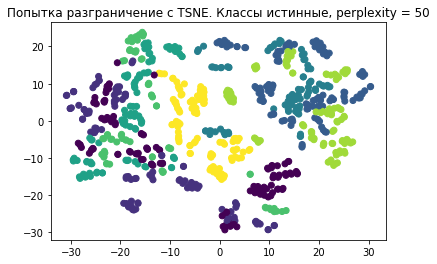

In [96]:
tsne = TSNE(n_components=2, perplexity = 50, )
x_train_tsne = tsne.fit_transform(x_train)
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=y_train)
plt.title('Попытка разграничение с TSNE. Классы истинные, perplexity = 50')

Text(0.5,1,'Попытка разграничение с TSNE. Классы истинные, perplexity = 50, learning_rate =500')

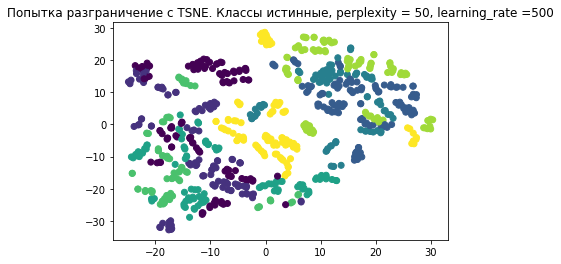

In [101]:
tsne = TSNE(n_components=2, perplexity = 50, learning_rate =500)
x_train_tsne = tsne.fit_transform(x_train)
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=y_train)
plt.title('Попытка разграничение с TSNE. Классы истинные, perplexity = 50, learning_rate =500')

Попробуем выполнить кластеризацию и визиализируем ее на tsne

In [102]:
from sklearn.cluster import DBSCAN

In [115]:
sc = DBSCAN(eps = 0.6)

In [116]:
y_dbscan = sc.fit_predict(x_train)

Text(0.5,1,'Попытка разграничение с TSNE. Классы истинные, perplexity = 50, learning_rate =500')

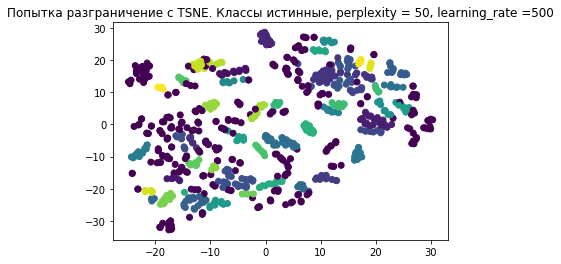

In [117]:

plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=y_dbscan)
plt.title('Попытка разграничение с TSNE. DBSCAN, perplexity = 50, learning_rate =500')

# 5. Проанализировать результат
получилось или нет, почему, что можно улучшить, можно ли интерпретировать результат

Что получилось: 
    - подготовить признаки для логистической регрессии
    - уменьшить количество признаков без значимого падения точности
    - неплохая попытка визуализации с помощью TSNE
Что не получилось:
    - точное разделение при 2 мерной проекции. 
    хотя скорее всего этого добиться сложно, 
    так как много классов и как было отмечено 
    при анализе логистической регрессии значимость признаков довольно близка
    - классификация - что в принципе и ожидалось,
    так как сложно подобрать оптимальные параметры. 

# 6. Повторить при необходимости 

Попробуем kmeans)

In [120]:
from sklearn.cluster import KMeans

In [122]:
km = KMeans(n_clusters=8)

In [123]:
y_km = km.fit_predict(x_train)

Text(0.5,1,'Попытка разграничение с TSNE. KMeans, perplexity = 50, learning_rate =500')

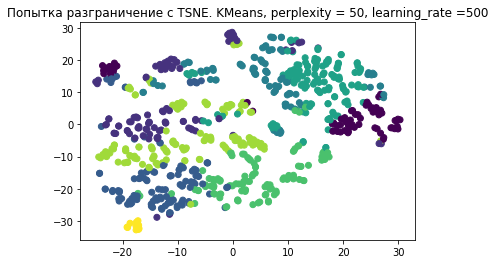

In [126]:

plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=y_km)
plt.title('Попытка разграничение с TSNE. KMeans, perplexity = 50, learning_rate =500')

Попытка не очень удачная, зато визуализация очень хорошая)

# Подсказки

* Проводить EDA и работу с признаками на всем датасете
* Для построения модели отсеивать данные тем или иным способом (обосновать выбор) - уменьшить объем данных для анализа
* Оформлять для сдачи задания все эксперименты (в том числе неудачные). Так мы сможем увидеть процесс работы над заданием
* Не тратить 90% времени на первый этап. Планировать время так, чтобы успеть поработать над моделью (в равной степени над каждым пунктом).

In [ ]:
df = pd.read_csv('data.csv')
df.head()

In [ ]:
df['diagnosis'] = pd.Categorical(df.diagnosis).codes 
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.head()

In [ ]:
X = df.drop(['id', 'diagnosis'], axis=1).as_matrix()
X.shape

In [ ]:
y = df['diagnosis'].as_matrix()
y.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

In [ ]:
dir(pca)

In [ ]:
pca.components_
